In [1]:
%matplotlib inline

In [2]:
# import dependencies
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib as mlp
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer

In [3]:
# read in the life expectancy data
# source: https://www.kaggle.com/kumarajarshi/life-expectancy-who
life_expectancy_df = pd.read_csv("data/Life_Expectancy_Data.csv")
life_expectancy_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
# read in the continents2 file
# source: https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region
continents2_df = pd.read_csv("data/continents2.csv")
continents2_df

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [5]:
continents2_df.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [6]:
continents2_df.rename(columns={"name": "Country"}, inplace=True)
continents = continents2_df.copy()
continents.drop(columns=['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2',
       'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'], inplace=True)
continents

,Country,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [7]:
# merge the two DataFrames on name and Country
life_Exp_df = pd.merge(life_expectancy_df, continents, on=["Country"])

In [8]:
# inspect data types and check for null-values using pandas info method
life_Exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2617
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2618 non-null   object 
 1   Year                             2618 non-null   int64  
 2   Status                           2618 non-null   object 
 3   Life expectancy                  2608 non-null   float64
 4   Adult Mortality                  2608 non-null   float64
 5   infant deaths                    2618 non-null   int64  
 6   Alcohol                          2443 non-null   float64
 7   percentage expenditure           2618 non-null   float64
 8   Hepatitis B                      2121 non-null   float64
 9   Measles                          2618 non-null   int64  
 10   BMI                             2584 non-null   float64
 11  under-five deaths                2618 non-null   int64  
 12  Polio               

In [9]:
# examine column names (look for extra spacing)
life_Exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'region', 'sub-region'],
      dtype='object')

In [10]:
# remove extra space from "Life expectancy " using pandas rename
life_Exp_df.rename(columns={
    "Life expectancy ": "Life_Exp",
    "Measles ": "Measles",
    " BMI ": "BMI",
    "under-five deaths ": "under-five deaths",
    "Diphtheria ": "Diphtheria",
    " HIV/AIDS": "HIV/AIDS",
    " thinness  1-19 years": "thinness 1-19 years",
    " thinness 5-9 years": "thinness 5-9 years"
}, inplace=True)

life_Exp_df.columns

Index(['Country', 'Year', 'Status', 'Life_Exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'region', 'sub-region'],
      dtype='object')

In [11]:
# df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
life_Exp_df['Year'] = pd.to_datetime(life_Exp_df['Year'], format='%Y', errors='coerce')

life_Exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2617
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2618 non-null   object        
 1   Year                             2618 non-null   datetime64[ns]
 2   Status                           2618 non-null   object        
 3   Life_Exp                         2608 non-null   float64       
 4   Adult Mortality                  2608 non-null   float64       
 5   infant deaths                    2618 non-null   int64         
 6   Alcohol                          2443 non-null   float64       
 7   percentage expenditure           2618 non-null   float64       
 8   Hepatitis B                      2121 non-null   float64       
 9   Measles                          2618 non-null   int64         
 10  BMI                              2584 non-null   float64    

In [13]:
life_Exp_df.describe()

,Life_Exp,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,gdpPercap
count,2608.000000,2608.000000,2618.000000,2443.000000,2618.000000,2121.000000,2618.000000,2584.000000,2618.000000,2599.000000,2427.000000,2599.000000,2618.000000,2418.000000,2.206000e+03,2584.000000,2584.000000,2595.000000,2599.000000,2.192000e+03
mean,69.345399,164.199003,30.639801,4.525989,823.104610,81.060349,2290.688312,38.498955,42.588235,82.429011,5.867503,82.615237,1.628648,7627.350536,1.270868e+07,4.845975,4.881192,0.631427,12.016199,4.009859e+07
std,9.474967,123.560094,123.551414,4.058229,2089.392737,24.921805,10838.971499,20.005526,167.983225,23.578564,2.431906,23.454288,4.535019,14442.400156,6.169869e+07,4.491346,4.576405,0.209911,3.423669,5.135864e+08
min,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,6.801655e+00
25%,63.300000,73.000000,0.000000,0.675000,13.021744,77.000000,0.000000,19.375000,0.000000,77.000000,4.220000,78.000000,0.100000,465.167884,1.973152e+05,1.600000,1.575000,0.491000,10.100000,1.274267e+04
50%,72.100000,144.000000,2.000000,3.670000,91.203608,92.000000,12.000000,43.500000,3.000000,93.000000,5.700000,93.000000,0.100000,1813.390335,1.374823e+06,3.400000,3.400000,0.682000,12.400000,1.299248e+05
75%,75.700000,226.000000,21.000000,7.570000,513.157105,97.000000,334.000000,56.300000,27.000000,97.000000,7.485000,97.000000,0.800000,6269.358953,7.457944e+06,7.100000,7.200000,0.785000,14.400000,1.258097e+06
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,43.500000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.882010e+10


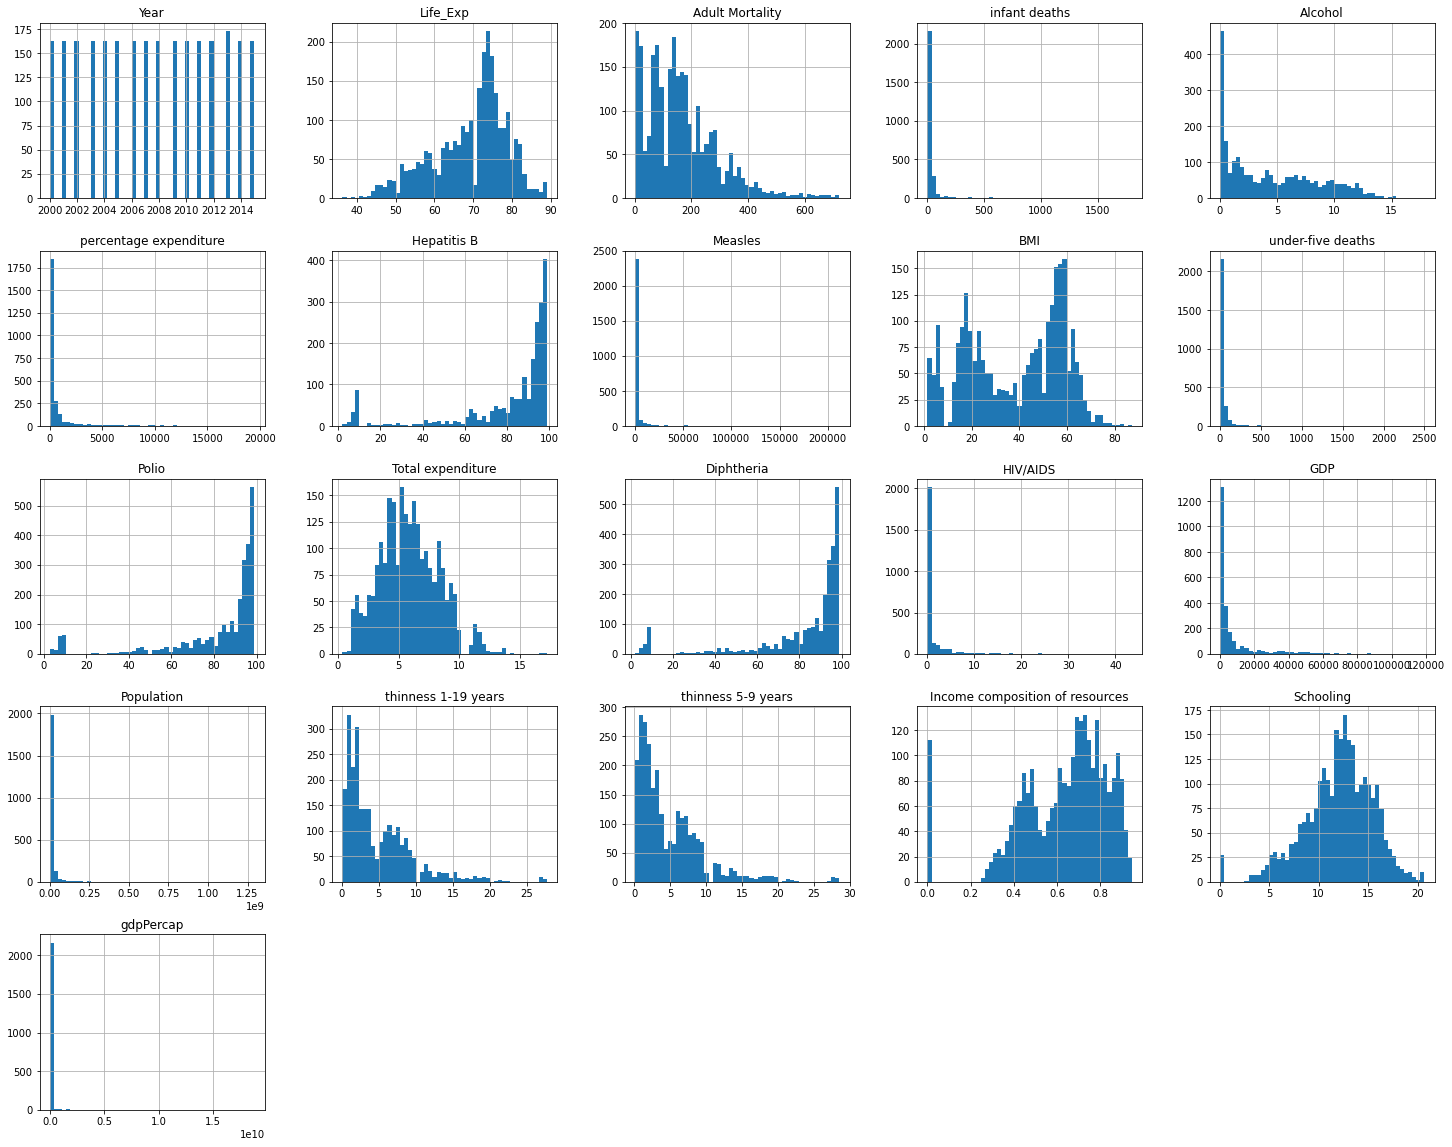

In [14]:
# review distribution of each "feature" using .hist method
life_Exp_df.hist(bins=50, figsize=(25,20))
plt.show()

In [15]:
# examine correlations 
corr_matrix = life_Exp_df.corr()

# examine how each attribute correlates with life expectancy
# note corr only meaures linear correclations
corr_matrix["Life_Exp"].sort_values(ascending=False) # sort in descending order

Life_Exp                           1.000000
Schooling                          0.761091
Income composition of resources    0.748063
BMI                                0.576559
Diphtheria                         0.493475
Polio                              0.479987
GDP                                0.464745
Alcohol                            0.409394
percentage expenditure             0.405864
Hepatitis B                        0.248655
Total expenditure                  0.196076
gdpPercap                          0.059575
Population                        -0.024808
Measles                           -0.150511
infant deaths                     -0.187374
under-five deaths                 -0.213710
thinness 5-9 years                -0.481438
thinness 1-19 years               -0.486458
HIV/AIDS                          -0.571006
Adult Mortality                   -0.701617
Name: Life_Exp, dtype: float64

In [16]:
# create a short list of attributes to examine using scatter_matrix method
attributes = [
    'Life_Exp',
    'Schooling',
    'Income composition of resources',
    'BMI',
    'GDP',
    'percentage expenditure',
    'Population', 
    'infant deaths'
]


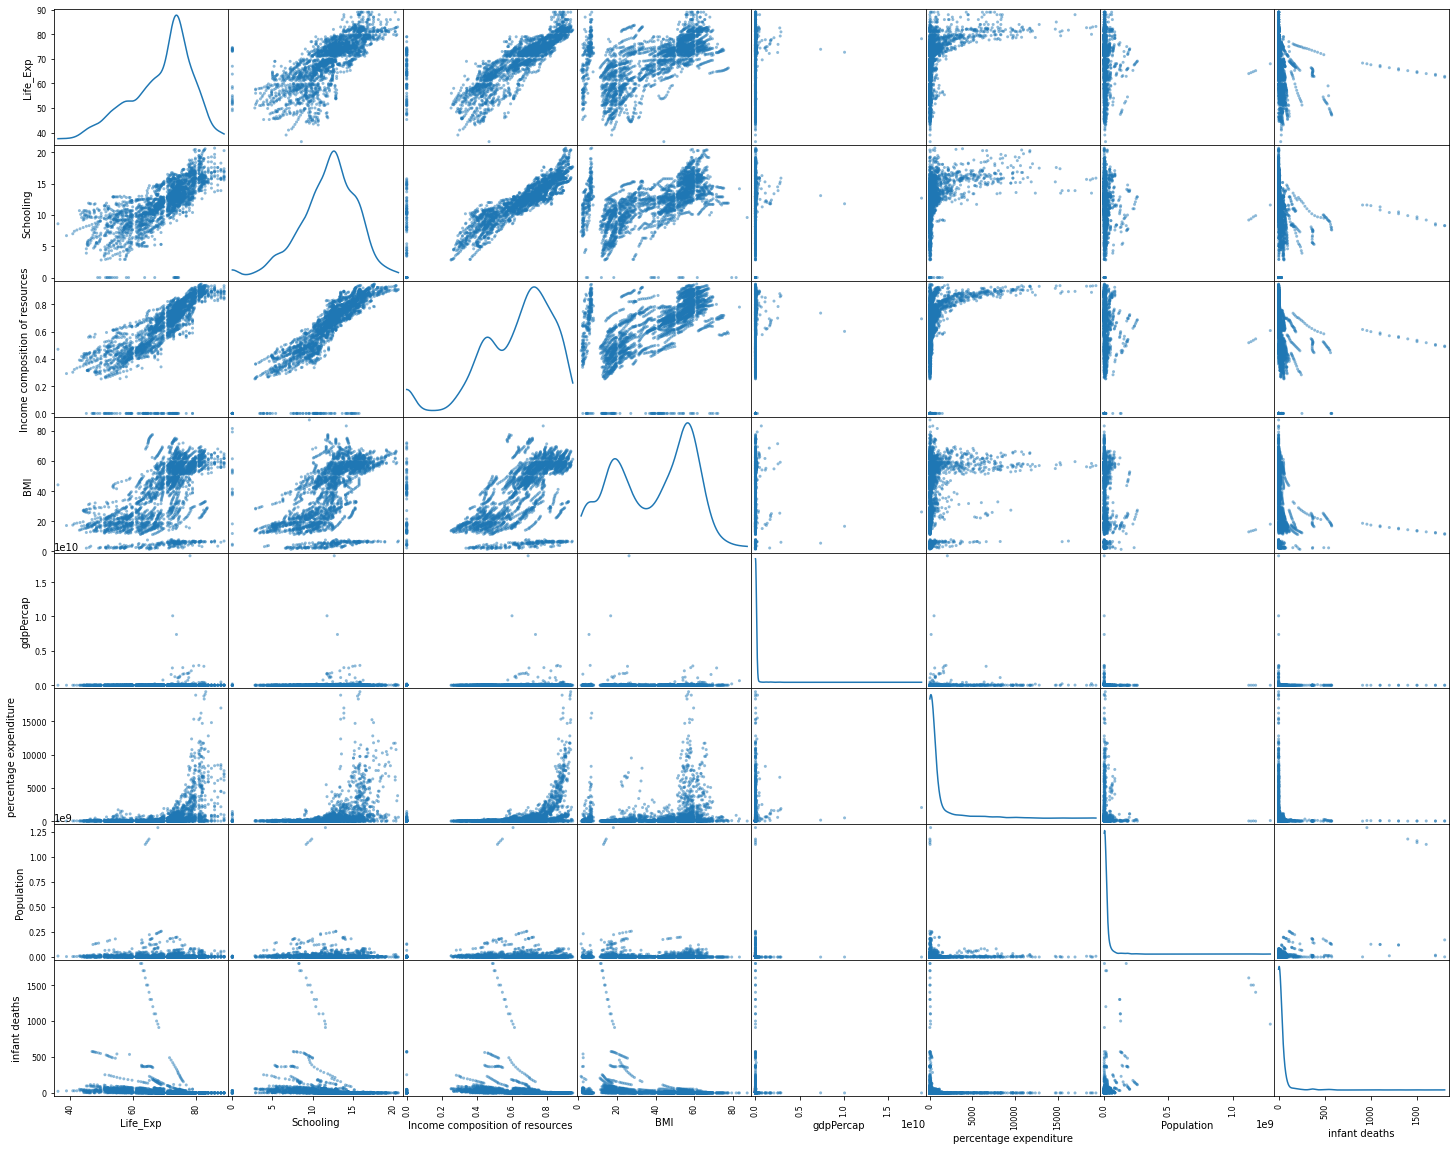

In [17]:
# examine scatter plot of numberical attribute agains every other  numerical attibute
scatter_matrix(life_Exp_df[attributes], figsize=(25,20), diagonal='kde')
plt.show()

In [18]:
# look again for missing values
life_Exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2617
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2618 non-null   object        
 1   Year                             2618 non-null   datetime64[ns]
 2   Status                           2618 non-null   object        
 3   Life_Exp                         2608 non-null   float64       
 4   Adult Mortality                  2608 non-null   float64       
 5   infant deaths                    2618 non-null   int64         
 6   Alcohol                          2443 non-null   float64       
 7   percentage expenditure           2618 non-null   float64       
 8   Hepatitis B                      2121 non-null   float64       
 9   Measles                          2618 non-null   int64         
 10  BMI                              2584 non-null   float64    

In [19]:
# group by country
life_expectancy_df_grouped = life_Exp_df.groupby(['Country', 'Year']).mean()
life_expectancy_df_grouped

Life_Exp  Adult Mortality  infant deaths  Alcohol  \
Country     Year                                                            
Afghanistan 2000-01-01      54.8            321.0             88     0.01   
            2001-01-01      55.3            316.0             88     0.01   
            2002-01-01      56.2              3.0             88     0.01   
            2003-01-01      56.7            295.0             87     0.01   
            2004-01-01      57.0            293.0             87     0.02   
...                          ...              ...            ...      ...   
Zimbabwe    2011-01-01      54.9            464.0             28     6.00   
            2012-01-01      56.6            429.0             26     6.09   
            2013-01-01      58.0            399.0             25     6.39   
            2014-01-01      59.2            371.0             23     6.50   
            2015-01-01      67.0            336.0             22      NaN   

                        percentage expenditure  Hepatitis B  Measles   BMI  \
Country     Year                                                             
Afghanistan 2000-01-01               10.424960         62.0     6532  12.2   
            2001-01-01               10.574728         63.0     8762  12.6   
            2002-01-01               16.887351         64.0     2486  13.0   
            2003-01-01               11.089053         65.0      798  13.4   
            2004-01-01               15.296066         67.0      466  13.8   
...                                        ...          ...      ...   ...   
Zimbabwe    2011-01-01               63.750530         94.0        0  29.9   
            2012-01-01               92.602336         97.0        0   3.3   
            2013-01-01               10.666707         95.0        0   3.8   
            2014-01-01               10.822595         91.0        0  31.3   
            2015-01-01                0.000000         87.0        0  31.8   

                        under-five deaths  Polio  Total expenditure  \
Country     Year                                                      
Afghanistan 2000-01-01                122   24.0               8.20   
            2001-01-01                122   35.0               7.80   
            2002-01-01                122   36.0               7.76   
            2003-01-01                122   41.0               8.82   
            2004-01-01                120    5.0               8.79   
...                                   ...    ...                ...   
Zimbabwe    2011-01-01                 42   93.0               6.31   
            2012-01-01                 39   95.0               6.69   
            2013-01-01                 36   95.0               6.88   
            2014-01-01                 34   92.0               6.44   
            2015-01-01                 32   88.0                NaN   

                        Diphtheria  HIV/AIDS         GDP  Population  \
Country     Year                                                       
Afghanistan 2000-01-01        24.0       0.1  114.560000    293756.0   
            2001-01-01        33.0       0.1  117.496980   2966463.0   
            2002-01-01        36.0       0.1  187.845950  21979923.0   
            2003-01-01        41.0       0.1  198.728544   2364851.0   
            2004-01-01         5.0       0.1  219.141353  24118979.0   
...                            ...       ...         ...         ...   
Zimbabwe    2011-01-01        93.0      13.3  839.927936  14386649.0   
            2012-01-01        95.0       8.8  955.648466   1471826.0   
            2013-01-01        95.0       6.8  111.227396    155456.0   
            2014-01-01        91.0       6.3  127.474620  15411675.0   
            2015-01-01        87.0       6.2  118.693830  15777451.0   

                        thinness 1-19 years  thinness 5-9 years  \
Country     Year                                                  
Afghanistan 

In [20]:
# save to csv file
life_Exp_df.to_csv(path_or_buf="./data/life_Exp.csv", sep=',', encoding='utf-8')

In [21]:
# save to JSON using to_json method
life_expectancy_df.to_json(orient="index")

'{"0":{"Country":"Afghanistan","Year":2015,"Status":"Developing","Life expectancy ":65.0,"Adult Mortality":263.0,"infant deaths":62,"Alcohol":0.01,"percentage expenditure":71.27962362,"Hepatitis B":65.0,"Measles ":1154," BMI ":19.1,"under-five deaths ":83,"Polio":6.0,"Total expenditure":8.16,"Diphtheria ":65.0," HIV\\/AIDS":0.1,"GDP":584.25921,"Population":33736494.0," thinness  1-19 years":17.2," thinness 5-9 years":17.3,"Income composition of resources":0.479,"Schooling":10.1},"1":{"Country":"Afghanistan","Year":2014,"Status":"Developing","Life expectancy ":59.9,"Adult Mortality":271.0,"infant deaths":64,"Alcohol":0.01,"percentage expenditure":73.52358168,"Hepatitis B":62.0,"Measles ":492," BMI ":18.6,"under-five deaths ":86,"Polio":58.0,"Total expenditure":8.18,"Diphtheria ":62.0," HIV\\/AIDS":0.1,"GDP":612.696514,"Population":327582.0," thinness  1-19 years":17.5," thinness 5-9 years":17.5,"Income composition of resources":0.476,"Schooling":10.0},"2":{"Country":"Afghanistan","Year"